In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['Sex'].replace({'M':1, 'F':0}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df1= pd.get_dummies(data=df, columns=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df1.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1
5,39,1,120,339,0,170,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1
6,45,0,130,237,0,170,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
7,54,1,110,208,0,142,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
8,37,1,140,207,0,130,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
9,48,0,120,284,0,120,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling = ['Age','RestingBP','Cholesterol','MaxHR']
df1[scaling] = scaler.fit_transform(df1[scaling])

In [9]:
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.70,0.479270,0,0.788732,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
from sklearn.model_selection import train_test_split
X = df1.drop('HeartDisease', axis='columns')
y = df1['HeartDisease']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [13]:
X_train.shape

(734, 19)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=20)

Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.7534
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8515
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8747
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8583
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8651
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8692
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8787
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8774
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8896
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8801
Epoch 11/20
23/23 [

In [15]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8587


[0.3257780373096466, 0.8586956262588501]

In [16]:
predictions = model.predict(X_test)
# predictions

In [17]:
y_predicted = []
for elem in predictions:
    if elem>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)
    

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

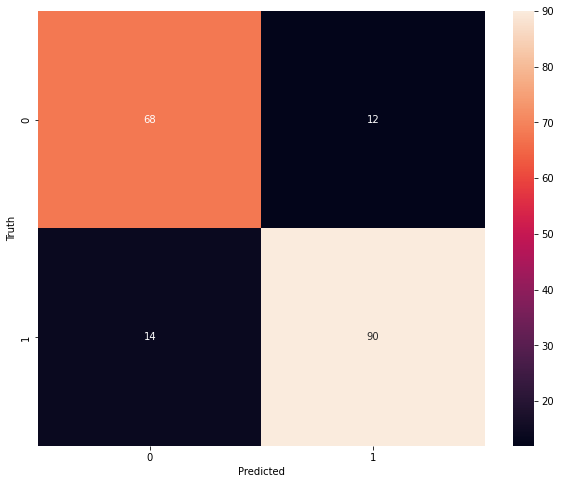

In [22]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model.save("heart_failure_model.h5")